# Philadelphia crime time visualization

In [6]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from IPython.display import HTML
from matplotlib.ticker import FuncFormatter
from pylab import rcParams
from matplotlib import animation

%matplotlib inline

In [8]:
import seaborn
import csv
import requests
from bs4 import BeautifulSoup

In [10]:
page = requests.get("https://www.kaggle.com/mchirico/philadelphiacrimedata")
soup = BeautifulSoup(page.content, 'html.parser')

In [11]:
Data = pd.read_csv('crime.csv')

# Sort the data in order of the date of the crime

In [12]:
Dat = pd.to_datetime(Data.Dispatch_Date_Time)
Data.Dispatch_Date_Time = Dat
Data.sort_values(by='Dispatch_Date_Time', inplace=True)
Data.index = np.array(range(Data.shape[0]))
Dat = pd.to_datetime(Data.Dispatch_Date_Time)
Data['all_hour'] = abs(Dat - Dat[0]).dt.total_seconds() / 3600.0

## how crime number changes in each of the Police Districts each year

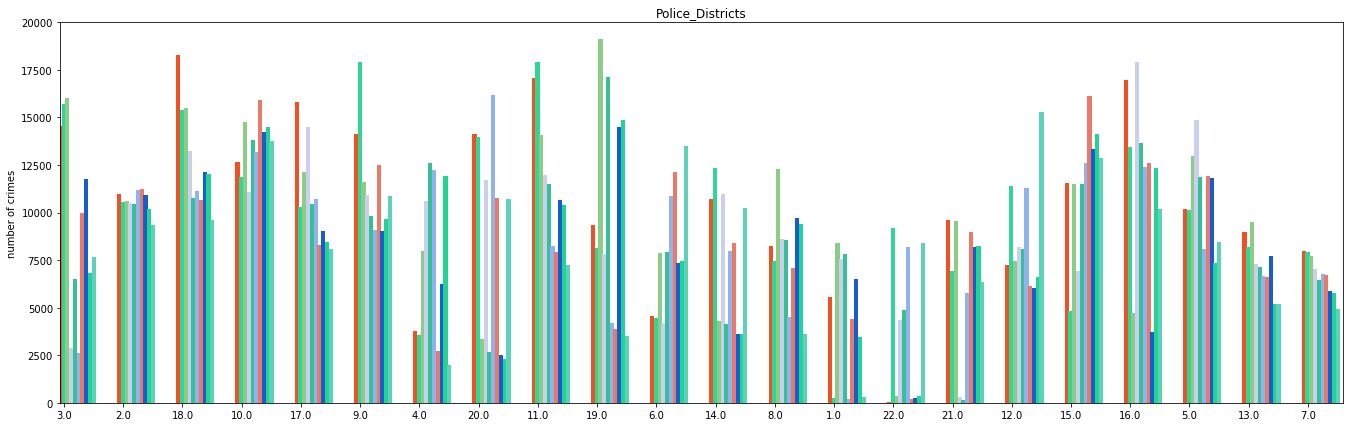

In [14]:
color = np.random.rand( Data.Police_Districts.value_counts(sort = False).shape[0], 3)
c = 0
rcParams['figure.figsize'] = 23, 7
for i in range(2006, 2016): 
    crimes = np.array( Data.Police_Districts[Data.year == i].value_counts(sort= False))
    N = crimes.shape[0]
    ind = np.arange(N)*1.2    
    width = 0.085
    p1 = plt.bar( ind + width*c*0.9, crimes, width, color= color[c])
    plt.ylabel('number of crimes')
    plt.title('Police_Districts')
    plt.xticks(ind+width, Data.Police_Districts[Data.year == 2006].value_counts(sort= False).index)
    plt.axis([0, 26, 0.0, 20000])
    c += 1

plt.show()

 ## different crimes changes in number per year

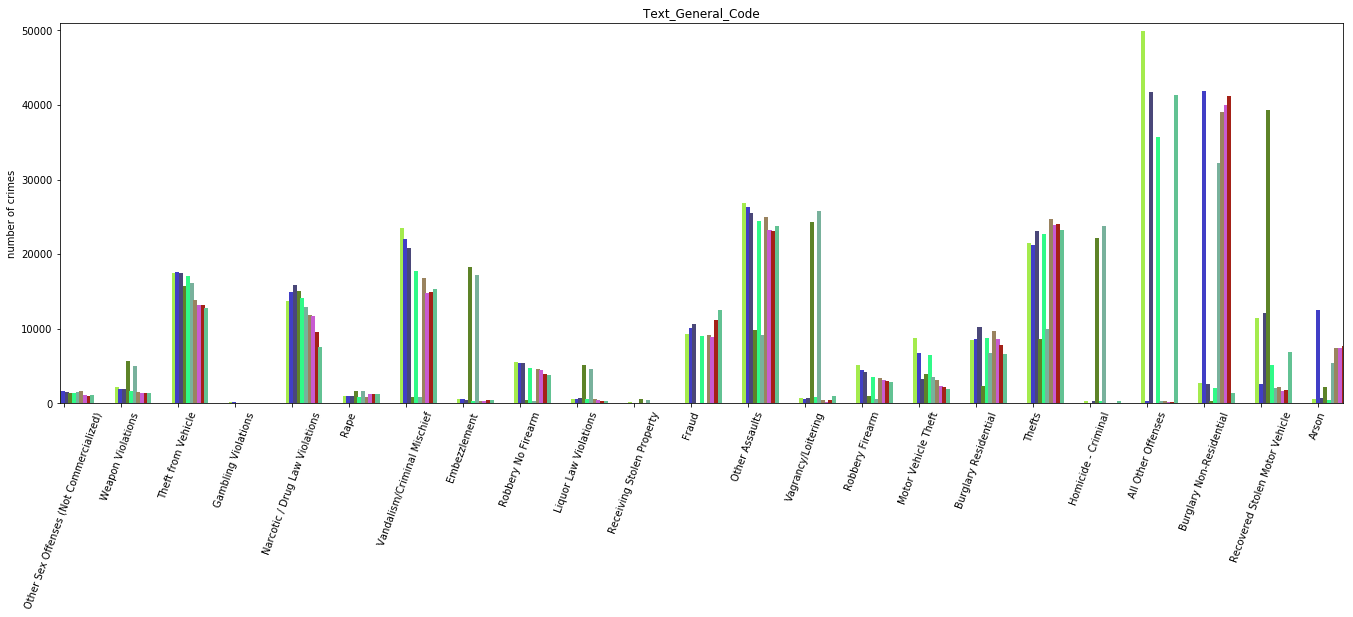

In [15]:
color = np.random.rand( Data.Text_General_Code.value_counts(sort= False).shape[0], 3)
c = 0
rcParams['figure.figsize'] = 23, 7
fig, ax = plt.subplots()
for i in range(2006, 2016):
    crimes = np.array( Data.Text_General_Code[Data.year == i].value_counts(sort= False))
    N = crimes.shape[0]
    ind = np.arange(N)*1.2    
    width = 0.085
    p1 = plt.bar( ind + width*c*0.9, crimes, width, color= color[c])
    plt.ylabel('number of crimes')
    plt.title('Text_General_Code')
    plt.xticks(ind+width, Data.Text_General_Code[Data.year == i].value_counts(sort= False).index, rotation = 70)
    plt.axis([0, 27, 0.0, 51000])
    c += 1

plt.show()

## crime numbers in each month per year

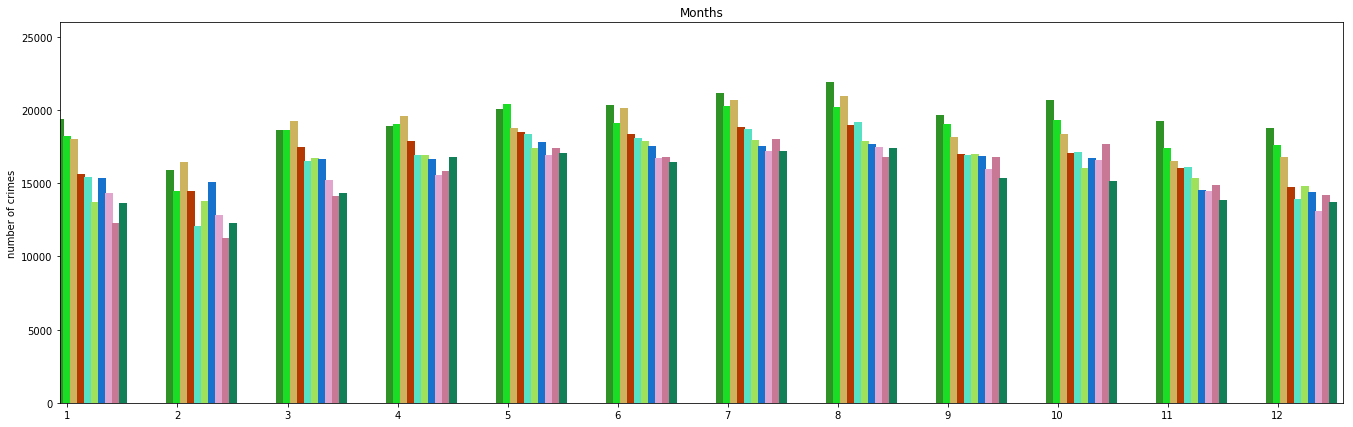

In [16]:
color = np.random.rand( Data.month.value_counts(sort= False).shape[0], 3)
c = 0
rcParams['figure.figsize'] = 23, 7
fig, ax = plt.subplots()
for i in range(2006, 2016):
    crimes = np.array( Data.month[Data.year == i].value_counts(sort= False))
    N = crimes.shape[0]
    ind = np.arange(N)*1.2    
    width = 0.085
    p1 = plt.bar( ind + width*c*0.9, crimes, width, color= color[c])
    plt.ylabel('number of crimes')
    plt.title('Months')
    plt.xticks(ind+width, Data.month[Data.year == i].value_counts(sort= False).index)
    plt.axis([0, 14, 0.0, 26000])
    c += 1

plt.show()

## How crime number changes in hours per year

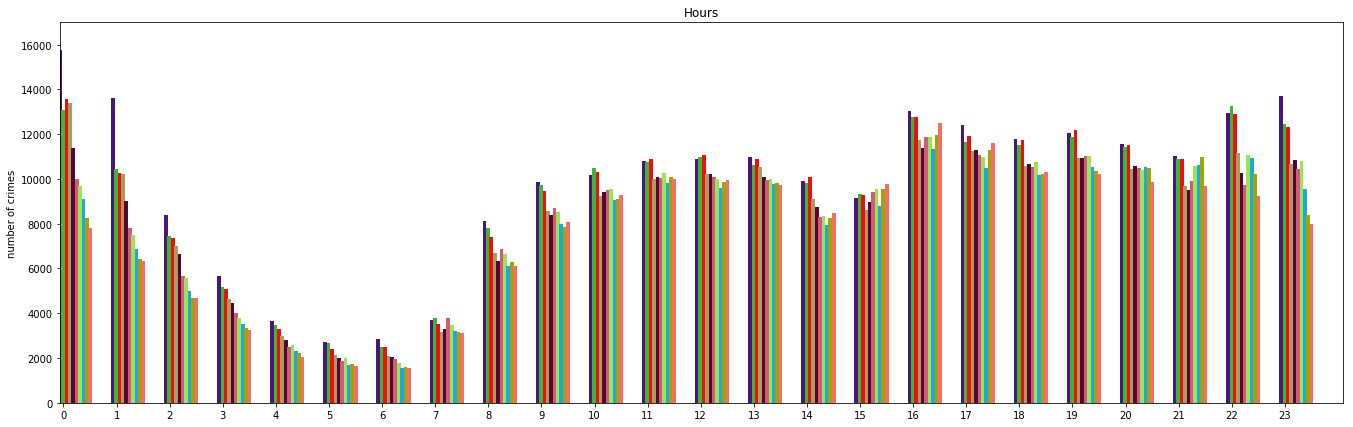

In [17]:
color = np.random.rand( Data.Hour.value_counts(sort= False).shape[0], 3)
c = 0
rcParams['figure.figsize'] = 23, 7
fig, ax = plt.subplots()
for i in range(2006, 2016):  
    crimes = np.array( Data.Hour[Data.year == i].value_counts(sort= False))
    N = crimes.shape[0]
    ind = np.arange(N)*1.2    
    width = 0.085
    p1 = plt.bar( ind + width*c*0.9, crimes, width, color= color[c])
    plt.ylabel('number of crimes')
    plt.title('Hours')
    plt.xticks(ind+width, Data.Hour[Data.year == i].value_counts(sort= False).index)
    plt.axis([0, 29, 0.0, 17000])
    c += 1

plt.show()